<a href="https://colab.research.google.com/github/pwy7fv/DS-4002-Group-Projects/blob/main/FF3_Vader_Analysis_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#getting files from github repo
!git clone https://github.com/pwy7fv/DS-4002-Group-Projects

Cloning into 'DS-4002-Group-Projects'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (149/149), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 319 (delta 88), reused 22 (delta 11), pack-reused 170 (from 1)
Receiving objects: 100% (319/319), 9.51 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Using Vader to test and score the sentiment of the reviews**


(got basis of code from cited reference [12] in our listed reference on README of GitHub repo)

In [5]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
#creating dataframe of FF3 data to clean it
df3 = pd.read_csv('/content/DS-4002-Group-Projects/DATA/Cleaned Data/FF3_clean_data.csv', low_memory=False)
df3.head()

,Index,Rating,Title,Content,Author Name,Date,Year
0,0,10.0,Definitely much better than Roper and Leno pai...,"For one thing, the caption that identifies the...",Carycomic,2006-06-16,2006
1,1,9.0,Good movie elevated by awesome action.,This movie has to be the most entertaining thi...,the_con_man298,2006-06-16,2006
2,2,5.0,eh...,"if you like minimum plot concern, tricked-out ...",sketchbook_romance,2006-06-16,2006
3,3,10.0,The fats and the furious Tokyo drift,I saw fast and the furious Tokyo drift today i...,igraynelewis,2006-06-16,2006
4,4,5.0,Eye Candy just like the other 2,"Fun, Fast and Flashy. Like the other 2 it most...",Physicker,2006-06-16,2006


In [24]:
#Got this code from cited reference [12]
def sentiment_scores(index, row):
    # Extract Content, Author Name, Date, Rating
    sentence = row["Content"]
    name = row["Author Name"]
    title = row['Title']
    review_date = row["Date"]
    review_year = row["Year"]
    rating = row["Rating"]

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()

    # Get sentiment scores
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Print details for the review
    print(f"\n{index + 1}st Statement:")
    print(f"Author Name: {name}")
    print(f"Title: {title}")
    print(f"Review Date: {review_date}")
    print(f"Review Year: {review_year}")
    print(f"Rating: {rating}")
    print(f"Review Content: {sentence}")

    # Print sentiment scores
    print("Overall sentiment dictionary is:", sentiment_dict)
    print(f"Sentence was rated as {sentiment_dict['neg'] * 100:.2f}% Negative")
    print(f"Sentence was rated as {sentiment_dict['neu'] * 100:.2f}% Neutral")
    print(f"Sentence was rated as {sentiment_dict['pos'] * 100:.2f}% Positive")

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentiment_label = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    print(f"Sentence Overall Rated As {sentiment_label}")

    # Return all sentiment values as a dictionary, this way it returns all the sentiment scores, not just overall
    #and so we can create new columns with that data and add it to the dataframe!
    return pd.Series({
        "Sentiment Negative": sentiment_dict['neg'],
        "Sentiment Neutral": sentiment_dict['neu'],
        "Sentiment Positive": sentiment_dict['pos'],
        "Sentiment Compound": sentiment_dict['compound'],
        "Sentiment Overall": sentiment_label
    })

In [25]:
#apply to the df3 dataframe to generate and store the sentiment scores
df3[["Negative Score", "Neutral SCore", "Positive Score", "Overall Percentage Score", "Overall Sentiment"]] = df3.apply(lambda row: sentiment_scores(row.name, row), axis=1)


1st Statement:
Author Name: Carycomic
Title: Definitely much better than Roper and Leno painted it!
Review Date: 2006-06-16
Review Year: 2006
Rating: 10.0
Review Content: For one thing, the caption that identifies the jetliner as landing at Tokyo International Airport was very useful. Because, otherwise, ALL THAT SCENE SHOWED WAS A JETLINER LANDING! Something that could have been stock footage shot at some other airport, for some other movie, over the last twenty years. Secondly; the writers of this movie tell a completely new story (for the most part). No overseas assignment for FBI Agent Conner, the lead-footed undercover guy from the first two flicks. Nope! We get a whole new lead-foot, named Sean Boswell. A navy brat whose parents are divorced: the mom living in Texas. And, the dad living in Tokyo. The street-racing segment that gets Sean exiled to Japan is refreshingly realistic, with regard to the consequences (both medical and legal). So, too, is Sean's ‘fish-out-water’ feeling

In [28]:
df3.head()

,Index,Rating,Title,Content,Author Name,Date,Year,Sentiment Overall,Negative Score,Neutral SCore,Positive Score,Overall Percentage Score
0,0,10.0,Definitely much better than Roper and Leno pai...,"For one thing, the caption that identifies the...",Carycomic,2006-06-16,2006,Positive,0.022,0.899,0.080,0.9714
1,1,9.0,Good movie elevated by awesome action.,This movie has to be the most entertaining thi...,the_con_man298,2006-06-16,2006,Positive,0.022,0.669,0.309,0.9956
2,2,5.0,eh...,"if you like minimum plot concern, tricked-out ...",sketchbook_romance,2006-06-16,2006,Positive,0.011,0.909,0.080,0.6808
3,3,10.0,The fats and the furious Tokyo drift,I saw fast and the furious Tokyo drift today i...,igraynelewis,2006-06-16,2006,Positive,0.046,0.750,0.204,0.9964
4,4,5.0,Eye Candy just like the other 2,"Fun, Fast and Flashy. Like the other 2 it most...",Physicker,2006-06-16,2006,Positive,0.110,0.743,0.147,0.6444


**Visualizations**

<Figure size 1200x600 with 0 Axes>

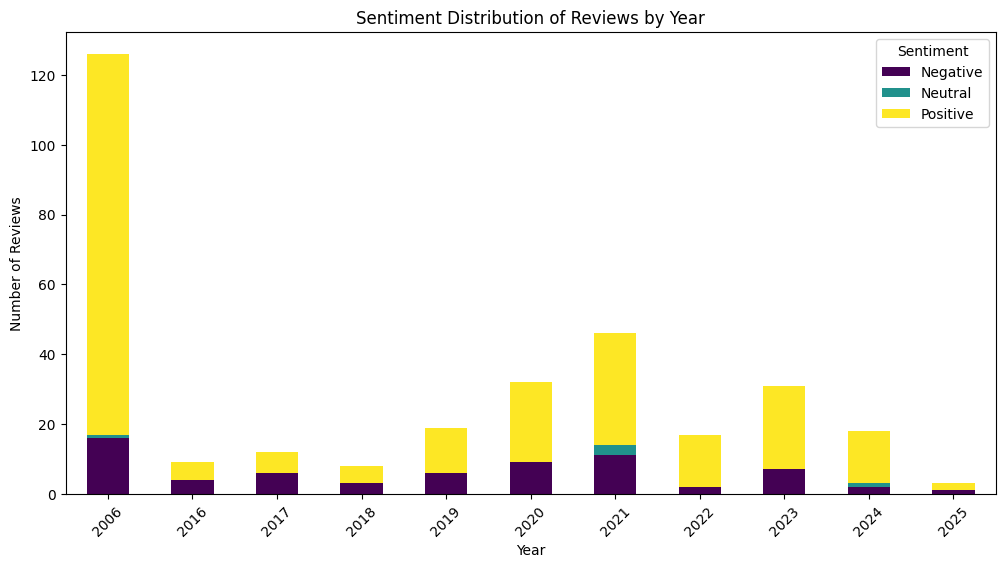

In [32]:

# Count occurrences of each sentiment per year
sentiment_counts = df3.groupby(["Year", "Sentiment Overall"]).size().reset_index(name="Count")

# Pivot the data to get Sentiment as columns
sentiment_pivot = sentiment_counts.pivot(index="Year", columns="Sentiment Overall", values="Count").fillna(0)

# Plot
plt.figure(figsize=(12, 6))
sentiment_pivot.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12,6))

# Labels and Title
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Sentiment Distribution of Reviews by Year")
plt.legend(title="Sentiment")
plt.xticks(rotation=45)

# Show Plot
plt.show()

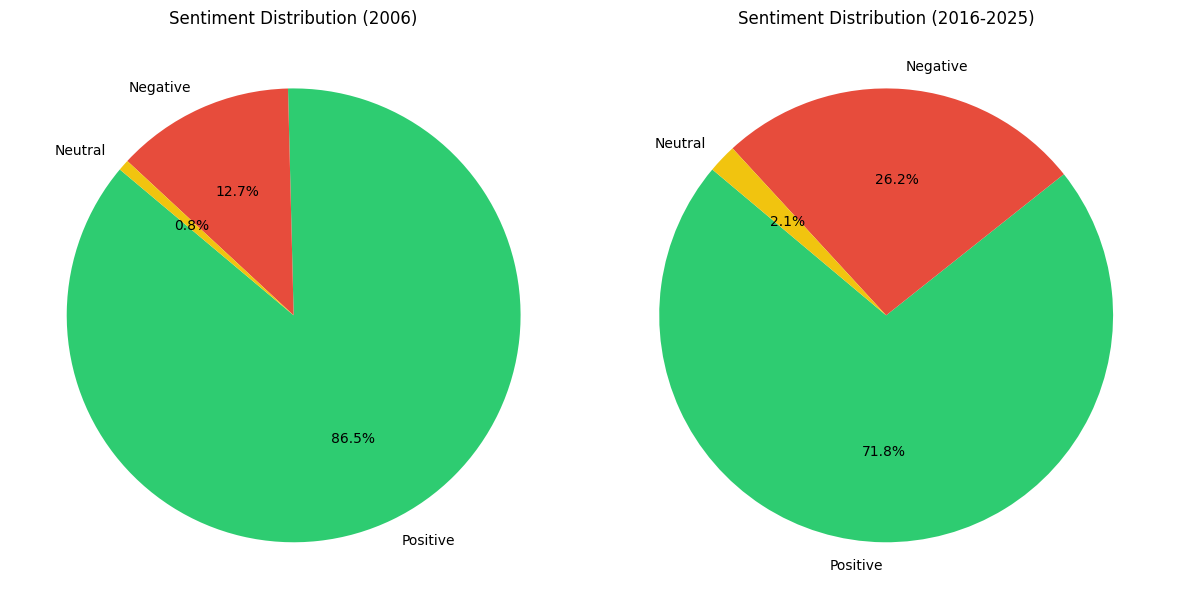

In [34]:
# Filter data for 2006 and 2016-2025
df_2006 = df3[df3["Year"] == 2006]
df_2016_2025 = df3[(df3["Year"] >= 2016) & (df3["Year"] <= 2025)]

# Count sentiment occurrences
sentiment_2006 = df_2006["Sentiment Overall"].value_counts(normalize=True) * 100  # Count and Convert to percentage
sentiment_2016_2025 = df_2016_2025["Sentiment Overall"].value_counts(normalize=True) * 100  # Count and Convert to percentage

# Pie chart labels and colors
labels = ["Positive", "Neutral", "Negative"]
colors = ["#2ecc71", "#e74c3c","#f1c40f"]  # Green, Yellow, Red

# Create subplots for side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 2006
axes[0].pie(sentiment_2006, labels=sentiment_2006.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title("Sentiment Distribution (2006)")

# Pie chart for 2016-2025
axes[1].pie(sentiment_2016_2025, labels=sentiment_2016_2025.index, autopct='%1.1f%%', colors=colors, startangle=140)
axes[1].set_title("Sentiment Distribution (2016-2025)")

# Show the pie charts
plt.tight_layout()
plt.show()

**Fast and Furious 4**